<a href="https://colab.research.google.com/github/Jimmy586/MachineLearningJourney/blob/master/Myfcm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import random
from sklearn import preprocessing
import numpy as np
import math
from collections import defaultdict

In [ ]:
#read dataset +drop nan value +normalize
data =pd.read_csv("pharyngitis.csv")
data1 = data.dropna()
data2 = preprocessing.normalize(data1)

In [ ]:
#drop y-label(radt) +convert to numpy array
data2 = data1.drop('radt',axis=1)
X =data2.to_numpy()
X

array([[2.000e+03, 7.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.001e+03, 1.170e+01, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.002e+03, 5.600e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [3.284e+03, 3.300e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.285e+03, 4.600e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [3.289e+03, 6.000e+00, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

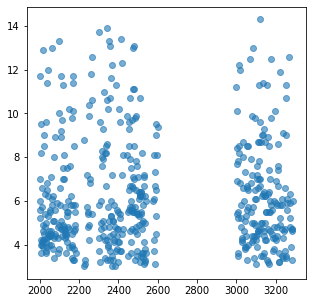

In [ ]:
#plot data before cluster
plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1], alpha=.6)
plt.show()

In [ ]:
X = np.asarray(X)
X

array([[2.000e+03, 7.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.001e+03, 1.170e+01, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.002e+03, 5.600e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [3.284e+03, 3.300e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.285e+03, 4.600e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [3.289e+03, 6.000e+00, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [ ]:
def euclidean_distance(p1,p2):
    dis=0
    for i in range(len(p1)):
        dis+=(p1[i]-p2[i])**2
    return dis**0.5

In [ ]:
pharyngitis_data = X
m=2  #value of p
n=len(pharyngitis_data) #number of rows
c=2 #numb of cluster
p=len(pharyngitis_data[0]) #numb of features
max_iter=5
n
X.shape

(512, 19)

In [ ]:
def initialize_membership_matrix(n,c):
    member_mat=[]
    for i in range(n):
        random_list=[random.random() for x in range(c)]
        summation=sum(random_list)
        for i in range(len(random_list)):
            random_list[i]=random_list[i]/summation
        member_mat.append(random_list)
    member=np.asarray(member_mat)
    return member


In [ ]:
def update_centroid(member_mat,c,p,n,data):
    centroids={}
    #print("memeber mat== ",len(member_mat))
    print('hello')

    for j in range(c):
        temp=[]
        print('j')
        for k in range(p):
            print('p')
            add=0
            for i in range(n):
                print('n1')
                add+=member_mat[i][j]**m
                print("add= ",add)
            x=0
            for i in range(n):

                x+=(member_mat[i][j]**m)*(X[i][k])

            val=x/add
            print('n2')
            temp.append(val)
            temp1=np.array(temp)
            print('centroid=', temp1.shape)
            #temp=np.reshape(val,m+1)
            print("********************************************************************")
        centroids[j]=temp
        print('FINNNNNNNNN')
    temp1=np.array(centroids)
    print('centroid=', temp1.shape)
    return centroids

In [ ]:

def update_membership_matrix(member_mat,centroids):
    ratio=float(2/(m-1))

    for i in range(n):
        distances=list()
        for j in range(c):
            distances.append(euclidean_distance(data[i],centroids[j]))
        for j in range(c):
            den = sum([math.pow(float(distances[j]/distances[q]), ratio) for q in range(c)])
            member_mat[i][j] = float(1/den)


    return member_mat

In [ ]:
def find_cluster(member_mat):
    clusters=list()
    for i in range(n):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(member_mat[i]))
        clusters.append(idx)
    return clusters

In [ ]:
def check(old_member_mat,member_mat):
    diff=0
    for i in range(n):
        for j in range(c):
            diff+=old_member_mat[i][j]-member_mat[i][j]
    if(diff<0.01):
        return True
    return False

In [ ]:

def fuzzy_c_mean(X,c,p,n):

    member_mat=initialize_membership_matrix(n,c)
    for i in range(max_iter):
        print('init done')
        centroids=update_centroid(member_mat,c,p,n,X)
        print('centroids done ')
        print(centroids)
        print(member_mat.shape)
        old_member_mat=member_mat
        member_mat=update_membership_matrix(member_mat,centroids)
        cluster=find_cluster(member_mat)
        print(cluster)
        if(check(old_member_mat,member_mat)):
            print(i)
            break



    return cluster,centroids

In [ ]:
clusters,centroids=fuzzy_c_mean(X,c,p,n)
print("Final Centroid points are:")
print(clusters)


Streaming output truncated to the last 5000 lines.
n1
add=  20.741260706800105
n1
add=  20.97989285083475
n1
add=  21.309208671321652
n1
add=  21.314229095783553
n1
add=  21.622312560028895
n1
add=  22.03628758498006
n1
add=  22.12273069029805
n1
add=  23.082937206411128
n1
add=  23.32522556792702
n1
add=  24.31998815562186
n1
add=  25.037678616801912
n1
add=  25.18801731607848
n1
add=  25.915903911881124
n1
add=  26.4023021770339
n1
add=  26.89627687536822
n1
add=  27.026137777060832
n1
add=  27.644578209779148
n1
add=  28.410387130751126
n1
add=  28.653909848686347
n1
add=  29.10344328756419
n1
add=  29.732445051072645
n1
add=  29.80459362689234
n1
add=  29.899475054405528
n1
add=  30.42982048599151
n1
add=  30.830431231257393
n1
add=  30.944700991444353
n1
add=  31.266920751696386
n1
add=  31.537832805014865
n1
add=  32.41378133329218
n1
add=  32.710297633189676
n1
add=  32.997095239528925
n1
add=  33.03586977616867
n1
add=  33.2062416538465
n1
add=  33.43086709149907
n1
add=  33.58

KeyError: ignored

In [ ]:
# labeling the clusters
def label_clusters(clusters):
    z=0
    o=0
    t=0
    dict=defaultdict(int)


    for i in range(50):
        if(clusters[i]==0):
            z=z+1
        elif(clusters[i]==1):
            o=o+1
        else:
            t=t+1
    dict[z]=0
    dict[o]=1
    dict[t]=2
    classes=[]
    fin1=max(z,max(o,t))

    classes.append(dict[fin1])
    z=0
    o=0
    t=0
    for i in range(50,100):
        if(clusters[i]==0):
            z=z+1
        elif(clusters[i]==1):
            o=o+1
        else:
            t=t+1
    dict[z]=0
    dict[o]=1
    dict[t]=2

    fin1=max(z,max(o,t))

    classes.append(dict[fin1])
    z=0
    o=0
    t=0
    for i in range(100,150):
        if(clusters[i]==0):
            z=z+1
        elif(clusters[i]==1):
            o=o+1
        else:
            t=t+1
    dict[z]=0
    dict[o]=1
    dict[t]=2
    fin1=max(z,max(o,t))

    classes.append(dict[fin1])

    return classes

In [ ]:
classes=label_clusters(clusters)
classes

In [ ]:
def getCrispvalue(alpha, w):
  n,m= w.shape
  crispValues=w
  for i in range(n):
    for j in range(m):
      if w[i][j]>=alpha:
        crispValues[i][j]=1
      else:
        crispValues[i][j]=0
  return crispValues

In [ ]:
getCrispvalue(0.6, member_mat)